# Exploring the NZ Herald data

This notebook is for exploring the NZ Herald archive using modern NLP tools.

In [26]:
import numpy as np
import pandas as pd

import torch
from transformers import GPT2Tokenizer, GPT2Model

In [2]:
%%time
herald_data = pd.read_csv('../data/unzipped/nzherald_harvest.csv', low_memory = False)

CPU times: user 5.77 s, sys: 714 ms, total: 6.48 s
Wall time: 6.48 s


In [3]:
'{} articles found'.format(len(herald_data))

'509736 articles found'

In [4]:
'{} missing articles'.format(herald_data.paragraphs.isna().sum())

'177036 missing articles'

In [5]:
# Drop missing articles
herald_data = herald_data[~herald_data.paragraphs.isna()]

In [6]:
'{} articles remaining'.format(len(herald_data))

'332700 articles remaining'

In [7]:
%%time
herald_data['date'] = pd.to_datetime(herald_data.date)

CPU times: user 35.6 s, sys: 0 ns, total: 35.6 s
Wall time: 35.6 s


<AxesSubplot:xlabel='date,date'>

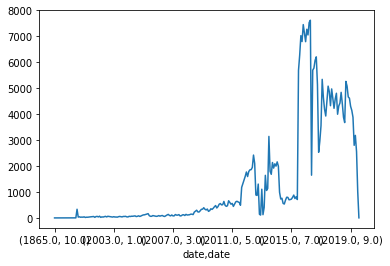

In [8]:
herald_data['paragraphs'].groupby([herald_data.date.dt.year, herald_data.date.dt.month]).count().plot(kind = 'line')

In [38]:
herald_data[herald_data.headline.isna()]

,url,byline,date,headline,sponsor,subheader,syndicator_name,paragraphs
164346,https://www.nzherald.co.nz/nz/news/article.cfm...,NaN,NaT,NaN,NaN,NaN,NZ Herald,New Zealand's most prominent politicians agree...
174724,https://www.nzherald.co.nz/nz/news/article.cfm...,"By: Simon Collins Education reporter, NZ Her...",NaT,NaN,NaN,NaN,NaN,School reports as we know them are on the way ...
176590,https://www.nzherald.co.nz/nz/news/article.cfm...,By: Scott Yeoman scott.yeoman@bayofplentyti...,NaT,NaN,NaN,NaN,NaN,"The Government stepped in with a $350,000 pled..."
181846,https://www.nzherald.co.nz/lifestyle/news/arti...,By: Matt Young and Vanessa Brown,NaT,NaN,NaN,NaN,news.com.au,An Australian woman who lives with K-cup breas...
183123,https://www.nzherald.co.nz/nz-herald-local-foc...,By: Alecia Rousseau,NaT,NaN,NaN,NaN,Manawatu Guardian,While driving his family to Whanganui one even...
186602,https://www.nzherald.co.nz/small-business-sme/...,"By: Hunter Calder Videojournalist Waikato, N...",NaT,NaN,NaN,NaN,NaN,The Isaacs family have lived on Te Arahori St ...
190733,https://www.nzherald.co.nz/world/news/article....,By: Chris Spargo for Daily Mail,NaT,NaN,NaN,NaN,Daily Mail,"Charles Manson has left his entire estate, and..."
201084,https://www.nzherald.co.nz/entertainment/news/...,NaN,NaT,NaN,NaN,NaN,NZ Herald,The APRA's Silver Scroll award nominee list is...
217663,https://www.nzherald.co.nz/nz/news/article.cfm...,"By: Nicholas Jones Political reporter, NZ He...",NaT,NaN,NaN,NaN,NaN,Gareth Morgan says his reaction to Labour's su...


In [27]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute")).unsqueeze(0)  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [34]:
outputs[0].flatten().shape

torch.Size([4608])